In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [35]:
data = pd.read_csv('source/repos/ml_univer/3/Titanic.csv')

In [36]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
data_cleaned = data.dropna()
non_numeric_columns = data_cleaned.select_dtypes(include=['object']).columns
columns_to_drop = [col for col in non_numeric_columns if col not in ['Sex', 'Embarked']]
data_cleaned = data_cleaned.drop(columns=columns_to_drop)

In [40]:
data_cleaned['Sex'] = data_cleaned['Sex'].map({'male': 0, 'female': 1})
data_cleaned['Embarked'] = data_cleaned['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})
data_cleaned = data_cleaned.drop(columns=['PassengerId'])

In [41]:
((data.shape[0] - data_cleaned.shape[0]) / data.shape[0]) * 100

79.46127946127946

In [45]:
X = data_cleaned.drop(columns=['Survived'])
y = data_cleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
(X_train.shape[0], X_test.shape[0])

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

Точность модели: 0.7297297297297297


In [43]:
X_without_embarked = X.drop(columns=['Embarked'])

X_train_we, X_test_we, y_train_we, y_test_we = train_test_split(
    X_without_embarked, y, test_size=0.2, random_state=42
)
model_without_embarked = LogisticRegression(max_iter=1000)
model_without_embarked.fit(X_train_we, y_train_we)

y_pred_we = model_without_embarked.predict(X_test_we)

accuracy_without_embarked = accuracy_score(y_test_we, y_pred_we)

In [47]:
print(f"Точность модели со всеми признаками: {accuracy}")
print(f"Точность модели без признака Embarked: {accuracy_without_embarked}")

Точность модели со всеми признаками: 0.7297297297297297
Точность модели без признака Embarked: 0.7297297297297297


## часть 2

In [49]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [50]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_scaled, y)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

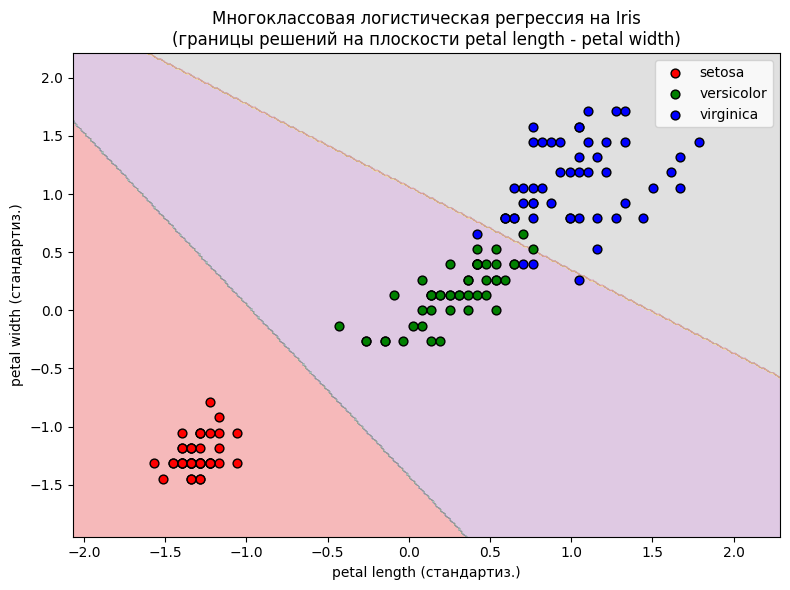

In [51]:
x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)

for i, color, label in zip([0, 1, 2], ['red', 'green', 'blue'], iris.target_names):
    plt.scatter(X_scaled[y == i, 0], X_scaled[y == i, 1],
                c=color, label=label, edgecolor='k', s=40)

plt.xlabel('petal length (стандартиз.)')
plt.ylabel('petal width (стандартиз.)')
plt.title('Многоклассовая логистическая регрессия на Iris\n(границы решений на плоскости petal length - petal width)')
plt.legend()
plt.tight_layout()
plt.show()